In [4]:
#Standard imports 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import requests as r
from PIL import Image
%matplotlib inline

file = '../Potential Datasets/h1b-disclosure-dataset/H1B Disclosure Dataset Files/H1B Disclosure Dataset Files/1. master h1b dataset.csv'
df = pd.read_csv(file,index_col=0,encoding='latin-1', low_memory=False)
df.head()

,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,VISA_CLASS,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,SOC_NAME,...,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_STATE,WORKSITE_POSTAL_CODE,CASE_STATUS
CASE_SUBMITTED_DAY,,,,,,,,,,,,,,,,,,,,,
24,2,2016,1,10,2016,H1B,DISCOVER PRODUCTS INC,IL,UNITED STATES OF AMERICA,ANALYSTS,...,2015.0,OFLC ONLINE DATA CENTER,65811.0,67320.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
4,3,2016,1,10,2016,H1B,DFS SERVICES LLC,IL,UNITED STATES OF AMERICA,ANALYSTS,...,2015.0,WILLIS TOWERS WATSON SURVEY,53000.0,57200.0,Year,N,N,IL,60015,CERTIFIEDWITHDRAWN
10,3,2016,1,10,2016,H1B,EASTBANC TECHNOLOGIES LLC,DC,UNITED STATES OF AMERICA,ANALYSTS,...,2015.0,OFLC ONLINE DATA CENTER,77000.0,0.0,Year,Y,N,DC,20007,CERTIFIEDWITHDRAWN
28,9,2016,1,10,2016,H1B,INFO SERVICES LLC,MI,UNITED STATES OF AMERICA,COMPUTER OCCUPATION,...,2016.0,OFLC ONLINE DATA CENTER,102000.0,0.0,Year,Y,N,NJ,7302,WITHDRAWN
22,2,2015,2,10,2016,H1B,BBandT CORPORATION,NC,UNITED STATES OF AMERICA,ANALYSTS,...,2015.0,OFLC ONLINE DATA CENTER,132500.0,0.0,Year,N,N,NY,10036,CERTIFIEDWITHDRAWN


In [5]:
df.columns.tolist()

['CASE_SUBMITTED_MONTH',
 'CASE_SUBMITTED_YEAR',
 'DECISION_DAY',
 'DECISION_MONTH',
 'DECISION_YEAR',
 'VISA_CLASS',
 'EMPLOYER_NAME',
 'EMPLOYER_STATE',
 'EMPLOYER_COUNTRY',
 'SOC_NAME',
 'NAICS_CODE',
 'TOTAL_WORKERS',
 'FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'PW_UNIT_OF_PAY',
 'PW_SOURCE',
 'PW_SOURCE_YEAR',
 'PW_SOURCE_OTHER',
 'WAGE_RATE_OF_PAY_FROM',
 'WAGE_RATE_OF_PAY_TO',
 'WAGE_UNIT_OF_PAY',
 'H-1B_DEPENDENT',
 'WILLFUL_VIOLATOR',
 'WORKSITE_STATE',
 'WORKSITE_POSTAL_CODE',
 'CASE_STATUS']

In [6]:
df['CASE_STATUS'].unique()

array(['CERTIFIEDWITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'], dtype=object)

In [26]:
df_certified = df[df['CASE_STATUS']=='CERTIFIED'].groupby(['CASE_SUBMITTED_YEAR']).count()
df_certified = df_certified[['CASE_SUBMITTED_MONTH']]
df_certified = df_certified.rename(columns={'CASE_SUBMITTED_MONTH':'CERTIFIED'})
df_certified.index.names = ['YEAR']
df_certified

,CERTIFIED
YEAR,
2016,81471
2017,387498


In [58]:
df_denied = df[df['CASE_STATUS']!='CERTIFIED'].groupby(['CASE_SUBMITTED_YEAR']).count()
df_denied = df_denied[['CASE_SUBMITTED_MONTH']]
df_denied = df_denied.rename(columns={'CASE_SUBMITTED_MONTH':'DENIED OR WITHDRAWN'})
df_denied.index.names = ['YEAR']
df_denied = df_denied.drop(np.arange(2011,2016))
df_denied

,DENIED OR WITHDRAWN
YEAR,
2016,18690
2017,27967


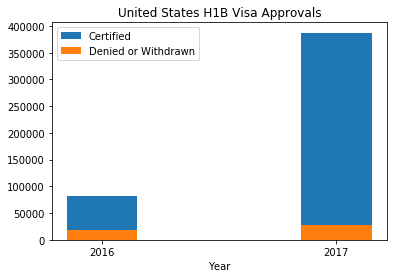

In [86]:
years = ['2016','2017']

fig,ax = plt.subplots()

p1 = plt.bar(years,df_certified['CERTIFIED'],width=0.3)
p2 = plt.bar(years,df_denied['DENIED OR WITHDRAWN'],width=0.3)
plt.title('United States H1B Visa Approvals')
plt.xlabel('Year')
plt.legend((p1[0],p2[0]),('Certified','Denied or Withdrawn'))
plt.savefig('Plots/USH1BVisa.png')

In [82]:
file2 = '../Potential Datasets/gtd/globalterrorismdb_0617dist.csv'
dfgtd = pd.read_csv(file2, encoding='cp1252', low_memory=False)

dfgtd = dfgtd[['iyear',
 'imonth',
 'iday',
 'country_txt',
 'region_txt',
 'city',
 'latitude',
 'longitude',
 'location',
 'success',
 'suicide',
 'attacktype1_txt',
 'targtype1_txt',
 'natlty1_txt',
 'gname',
 'weaptype1_txt',
 'nkill',
 'nwound']]


col_name = {'iyear': 'year',
 'imonth': 'month',
 'iday': 'day',
 'country_txt': 'country',
 'region_txt': 'region',
 'city': 'city',
 'latitude': 'latitude',
 'longitude': 'longitude',
 'location': 'location',
 'success': 'success',
 'suicide': 'sucide',
 'attacktype1_txt': 'type_of_attack',
 'targtype1_txt': 'type_of_target',
 'natlty1_txt': 'nationality',
 'gname': 'group_name',
 'weaptype1_txt': 'type_of_weapon',
 'nkill': 'num_killed',
 'nwound': 'num_wounded'}

dfgtd = dfgtd.rename(columns=col_name)

dfgtd = dfgtd.groupby(['year']).count()

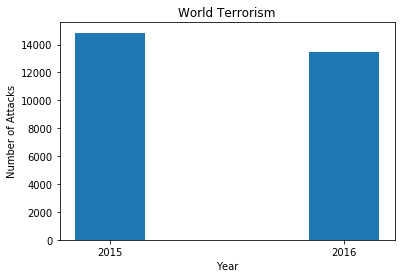

In [87]:
dfgtd = dfgtd[dfgtd.index > 2014]
dfgtd
years2 = ['2015','2016']

plt.bar(years2,dfgtd['month'],width=0.3)
plt.title('World Terrorism')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.savefig('Plots/WorldTerrorismBar.png')

In [90]:
images_list = ['Plots/WorldTerrorismBar.png','Plots/USH1BVisa.png']
imgs = [Image.open(i) for i in images_list]

img_merge = np.hstack(np.asarray(i) for i in imgs)
img_merge = Image.fromarray(img_merge)
img_merge.save('Plots/Terrorism vs H1B.png')